# Supervivencia celular en tratamientos fraccionados. TCP y NTCP

Generación de curvas de supervivencia celular según el modelo LQ en tratamientos fraccionados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Baja proliferación
alpha_b = .1
beta_b = .033
# Alta proliferación
alpha_a = .3
beta_a = .03


In [3]:
def FS_f(D, alpha, beta):
    FS = np.exp(-alpha*D - beta*D**2)
    return FS

In [4]:
def FS_frac_f(D, d, alpha, beta):

    def FS(D, alpha=alpha, beta=beta):
        return FS_f(D, alpha, beta)
    
    fractions = D // d
    remainder_D = D % d

    FS_frac = FS(d)**fractions * FS(remainder_D) / FS(0)
    return FS_frac

In [5]:
D_v = np.arange(0, 50, 1)
FS_frac_a_v = FS_frac_f(D=D_v, d=10, alpha=alpha_a, beta=beta_a)
FS_frac_b_v = FS_frac_f(D=D_v, d=10, alpha=alpha_b, beta=beta_b)

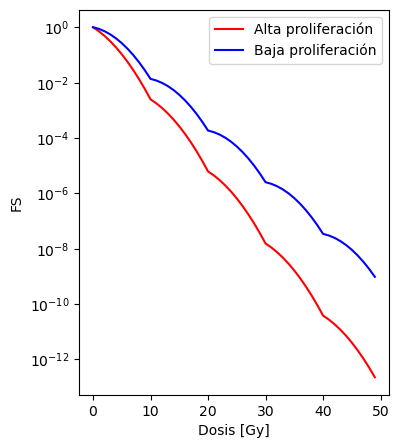

In [6]:
fig, ax = plt.subplots(figsize=(4, 5))

ax.plot(D_v, FS_frac_a_v, 'r-', label='Alta proliferación')
ax.plot(D_v, FS_frac_b_v, 'b-', label='Baja proliferación')

ax.set_yscale('log')

ax.set_xlabel('Dosis [Gy]')
ax.set_ylabel('FS')

ax.legend()

plt.show()

## Modelos de respuesta TCP y NTCP

In [45]:
def TCP_f(D, d, alpha, beta):
    N_0 = 1e8
    S = N_0 * FS_frac_f(D=D, d=d, alpha=alpha, beta=beta)
    TCP = np.exp(-S)
    return TCP

def NTCP_f(D, d, alpha, beta):
    N_0 = 1e8
    S = N_0 * FS_frac_f(D=D, d=d, alpha=alpha, beta=beta)
    NTCP = np.exp(-S)
    return NTCP


In [66]:
D_v = np.arange(0,50,0.1)
TCP_beta0 = TCP_f(D=D_v, d=10, alpha=alpha_a*3, beta=0)
NTCP_beta0 = NTCP_f(D=D_v, d=10, alpha=alpha_a*2.4, beta=0)

TCP_a = TCP_f(D=D_v, d=10, alpha=alpha_a, beta=beta_a)
TCP_b = TCP_f(D=D_v, d=10, alpha=alpha_b, beta=beta_b)


In [68]:
import matplotlib.patches as patches

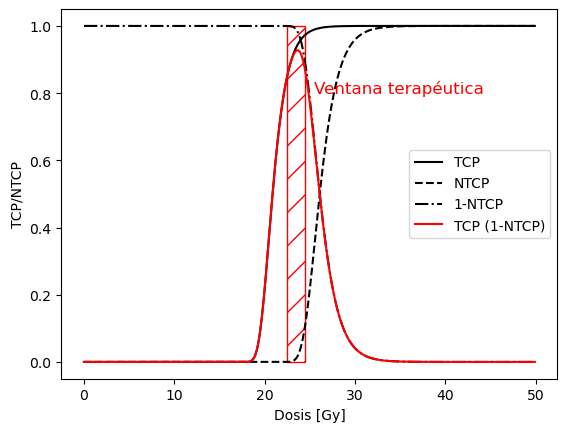

In [86]:
fig, ax = plt.subplots()

ax.plot(D_v, TCP_beta0, 'k-', label='TCP')
ax.plot(D_v, NTCP_beta0, 'k--', label='NTCP')

ax.plot(D_v, 1-NTCP_beta0, 'k-.', label='1-NTCP')
ax.plot(D_v, TCP_beta0*(1-NTCP_beta0), 'r-', label='TCP (1-NTCP)')

rect = patches.Rectangle((22.5, 0), 2, 1, linewidth=1, edgecolor='r', facecolor='none', hatch='/')
ax.add_patch(rect)

ax.text(25.5, 0.8, 'Ventana terapéutica', fontsize=12, color='red')

ax.set_xlabel('Dosis [Gy]')
ax.set_ylabel('TCP/NTCP')

ax.legend()

plt.show()